# Telco Modelling

### Importing Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# modeling imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix


### Reading the cleaned CSV

In [2]:
telco_df = pd.read_csv('telco_merged_modelling.csv')

In [3]:
telco_df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,99.65,820.50,1,...,1,0,1,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,104.80,3046.05,1,...,1,0,1,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,103.70,5036.30,1,...,1,0,1,1,0,0,1,0,0,0


## 1. Creating a baseline model with LogisticRegression

### Setting features and target, then scaling the features  

In [4]:
X = telco_df.drop(columns = ['Churn Value'])
y = telco_df['Churn Value'].values

std_scale = StandardScaler()
X_scaled = std_scale.fit_transform(X)

### Splitting data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42, stratify=y)

### Cross validating the LogisticRegression model and looking at the precision, recall, and F2 scores 

### Making X_train a dataframe to change selected columns 

In [6]:
X_train_df = pd.DataFrame(X_train, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_Yes', 'Tech Support_No', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'])

cols = ['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months','Paperless Billing','Contract_Month-to-month',
        'Contract_Two year','Online Security_No','Online Backup_No', 'Satisfaction Score',
        'Internet Service_Fiber optic']

In [11]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f2_score' : make_scorer(fbeta_score, beta=2)}

model = LogisticRegression(max_iter=10000)

results = cross_validate(model, X_train_df[cols], y_train, cv=5, scoring=scoring)

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print("Metric:", metric_name)
    print("Scores:", results[metric_name])
    print("Average score:", average_score)
    print(" ")

Metric: fit_time
Scores: [0.04349995 0.02157688 0.01956701 0.020087   0.02082729]
Average score: 0.025111627578735352
 
Metric: score_time
Scores: [0.01074791 0.00924397 0.00870013 0.008286   0.0085907 ]
Average score: 0.009113740921020509
 
Metric: test_precision
Scores: [0.96       0.95017794 0.9352518  0.91349481 0.91752577]
Average score: 0.9352900634777338
 
Metric: test_recall
Scores: [0.88294314 0.89297659 0.86956522 0.88294314 0.89297659]
Average score: 0.8842809364548494
 
Metric: test_f2_score
Scores: [0.89734874 0.90385917 0.88195387 0.88888889 0.89778077]
Average score: 0.8939662877830257
 


### Looking at the confusion matrix

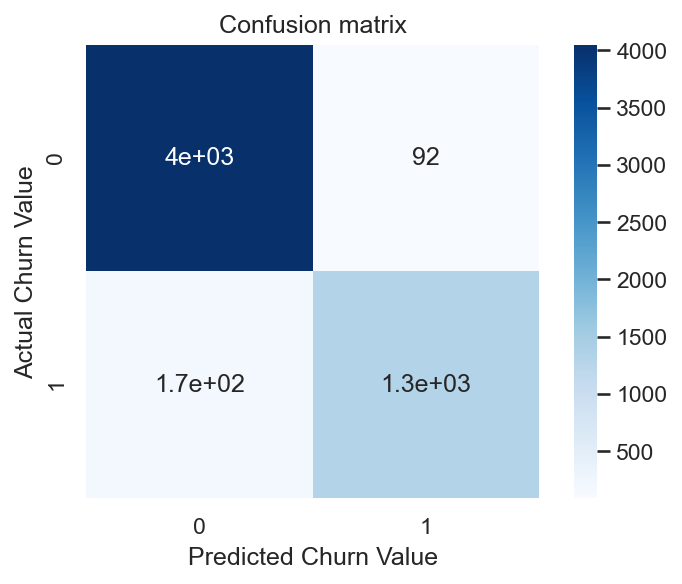

In [12]:
model = LogisticRegression(max_iter=10000)

y_pred = cross_val_predict(model, X_train_df[cols], y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)

plt.figure(dpi=150)
sns.heatmap(conf_mat, cmap=plt.cm.Blues, annot=True, square=True)
plt.xlabel('Predicted Churn Value')
plt.ylabel('Actual Churn Value')
plt.title('Confusion matrix');

## 2. Creating a different baseline model with RandomForest  

In [19]:
model2 = RandomForestClassifier(n_estimators=100)

results = cross_validate(model2, X_train, y_train, cv=5, scoring=scoring)

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print("Metric:", metric_name)
    print("Scores:", results[metric_name])
    print("Average score:", average_score)
    print(" ")

Metric: fit_time
Scores: [0.58069682 0.60239577 0.60613179 0.74133182 0.85582519]
Average score: 0.6772762775421143
 
Metric: score_time
Scores: [0.034307   0.03168726 0.04829907 0.06240702 0.07978392]
Average score: 0.05129685401916504
 
Metric: test_precision
Scores: [0.97037037 0.97026022 0.96282528 0.94444444 0.95620438]
Average score: 0.9608209392471189
 
Metric: test_recall
Scores: [0.87625418 0.8729097  0.86622074 0.85284281 0.87625418]
Average score: 0.8688963210702342
 
Metric: test_f2_score
Scores: [0.89358799 0.89078498 0.88395904 0.86971351 0.89115646]
Average score: 0.8858403981141834
 


### Double checking if any other model works better... 

In [36]:
classifiers = [['KNeighbours :', KNeighborsClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['Naive Bayes :', GaussianNB()]]

for name,classifier in classifiers:
    
    classifier = classifier
    results = cross_validate(classifier, X_train, y_train, cv=5, scoring=scoring)
    print(name)

    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print("Metric:", metric_name)
        print("Scores:", results[metric_name])
        print("Average score:", average_score)
        print(" ")
    print(" ")

KNeighbours :
Metric: fit_time
Scores: [0.00318694 0.00227189 0.00242686 0.00226903 0.0017581 ]
Average score: 0.0023825645446777345
 
Metric: score_time
Scores: [0.29590487 0.22700095 0.27080822 0.23162317 0.22860217]
Average score: 0.25078787803649905
 
Metric: test_precision
Scores: [0.78873239 0.77978339 0.82481752 0.75874126 0.75172414]
Average score: 0.780759740557694
 
Metric: test_recall
Scores: [0.74916388 0.72240803 0.75585284 0.72575251 0.72909699]
Average score: 0.7364548494983276
 
Metric: test_f2_score
Scores: [0.75675676 0.73319756 0.76870748 0.73211876 0.73351279]
Average score: 0.7448586680390681
 
 
LogisticRegression :
Metric: fit_time
Scores: [0.06280899 0.04435992 0.05976915 0.100559   0.05751276]
Average score: 0.0650019645690918
 
Metric: score_time
Scores: [0.00617719 0.00654483 0.00661397 0.00636911 0.0065763 ]
Average score: 0.0064562797546386715
 
Metric: test_precision
Scores: [0.94736842 0.93992933 0.92682927 0.9137931  0.93571429]
Average score: 0.93272688

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB :
Metric: fit_time
Scores: [1.02724719 0.99023199 1.3379128  1.30882907 1.23830676]
Average score: 1.1805055618286133
 
Metric: score_time
Scores: [0.01047778 0.01027703 0.01327801 0.01346803 0.01705503]
Average score: 0.012911176681518555
 
Metric: test_precision
Scores: [0.91929825 0.9434629  0.95       0.92013889 0.90540541]
Average score: 0.9276610874869663
 
Metric: test_recall
Scores: [0.87625418 0.89297659 0.88963211 0.88628763 0.89632107]
Average score: 0.8882943143812708
 
Metric: test_f2_score
Scores: [0.88453747 0.90263692 0.90108401 0.89285714 0.89812332]
Average score: 0.8958477739218009
 
 
Naive Bayes :
Metric: fit_time
Scores: [0.01317096 0.00918889 0.00954413 0.00810122 0.00573993]
Average score: 0.00914902687072754
 

### Deciding to stick with the LogisticRegression model and this seems to give the best F2 score 

## 3. Refining the LogisticRegression model: handling class imbalance 

### 3.1 Attempting different class weights

In [30]:
model1 = LogisticRegression(solver='liblinear')
model2 = LogisticRegression(class_weight='balanced', solver='liblinear')
model3 = LogisticRegression(class_weight={1 : 4, 0 : 1}, solver='liblinear')

model_list = [model1, model2, model3]

for model in model_list:
    print(model)
    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print("Metric:", metric_name)
        print("Scores:", results[metric_name])
        print("Average score:", average_score)
        print(" ")
    print(" ")

LogisticRegression(solver='liblinear')
Metric: fit_time
Scores: [0.0657661  0.07059383 0.0655551  0.0716908  0.06166506]
Average score: 0.0670541763305664
 
Metric: score_time
Scores: [0.01102805 0.00607395 0.00672698 0.00628901 0.00600505]
Average score: 0.007224607467651367
 
Metric: test_precision
Scores: [0.94736842 0.93971631 0.92682927 0.9137931  0.93571429]
Average score: 0.9326842781129226
 
Metric: test_recall
Scores: [0.90301003 0.88628763 0.88963211 0.88628763 0.87625418]
Average score: 0.8882943143812708
 
Metric: test_f2_score
Scores: [0.91154625 0.89648173 0.89683075 0.89165545 0.88753388]
Average score: 0.8968096118597657
 
 
LogisticRegression(class_weight='balanced', solver='liblinear')
Metric: fit_time
Scores: [0.06654692 0.06755495 0.09737396 0.07335591 0.06364179]
Average score: 0.07369470596313477
 
Metric: score_time
Scores: [0.00590324 0.00727892 0.00725102 0.00640607 0.00592899]
Average score: 0.00655364990234375
 
Metric: test_precision
Scores: [0.85498489 0.83

### Logistic Regression with 4:1 class weights worked best...
### Will see if a different ratio works better.... 

In [31]:
for i in range(1,10):
    model = LogisticRegression(class_weight={1 : i, 0 : 1}, solver='liblinear')
    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    print("Positive class weight:", i)
    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print("Metric:", metric_name)
        print("Scores:", results[metric_name])
        print("Average score:", average_score)
        print(" ")
    print(" ")

Positive class weight: 1
Metric: fit_time
Scores: [0.05714798 0.07854295 0.0656991  0.06225801 0.06188011]
Average score: 0.06510562896728515
 
Metric: score_time
Scores: [0.00586009 0.00814009 0.00609994 0.00633383 0.00601602]
Average score: 0.006489992141723633
 
Metric: test_precision
Scores: [0.94736842 0.93971631 0.92682927 0.9137931  0.93571429]
Average score: 0.9326842781129226
 
Metric: test_recall
Scores: [0.90301003 0.88628763 0.88963211 0.88628763 0.87625418]
Average score: 0.8882943143812708
 
Metric: test_f2_score
Scores: [0.91154625 0.89648173 0.89683075 0.89165545 0.88753388]
Average score: 0.8968096118597657
 
 
Positive class weight: 2
Metric: fit_time
Scores: [0.0653069  0.06521297 0.06935596 0.08301592 0.07141089]
Average score: 0.07086052894592285
 
Metric: score_time
Scores: [0.00597286 0.00599408 0.00628781 0.00589991 0.00607514]
Average score: 0.0060459613800048825
 
Metric: test_precision
Scores: [0.89171975 0.85981308 0.91059603 0.86956522 0.85448916]
Average s

### It seems that 5:1 class weights gives the best F2 score
### Quick look at the confusion matrix... 

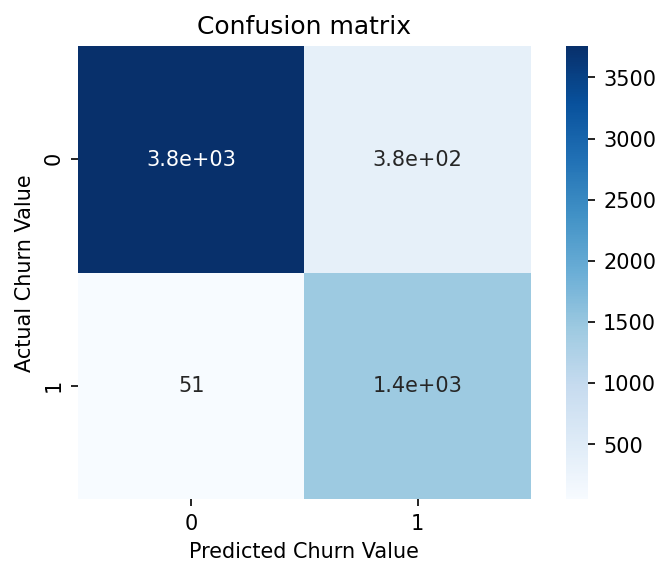

In [39]:
model = LogisticRegression(class_weight={1 : 5, 0 : 1}, solver='liblinear')

y_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)

plt.figure(dpi=150)
sns.heatmap(conf_mat, cmap=plt.cm.Blues, annot=True, square=True)
plt.xlabel('Predicted Churn Value')
plt.ylabel('Actual Churn Value')
plt.title('Confusion matrix');

### 3.2 Looking at different probability thresholds 

Text(0, 0.5, 'Metric score')

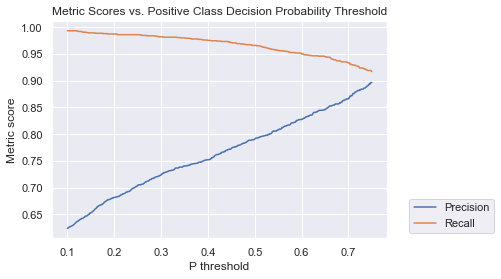

In [32]:
thresh_ps = np.linspace(.10,.75,1000) #generating probability thresholds 

model = LogisticRegression(class_weight={1 : 5, 0 : 1}, solver='liblinear') #using previous model 
proba = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba') #getting cross validated probabilities 

positive_proba = proba[:,1]

#f2_score = make_scorer(fbeta_score, beta=2)
prec_scores, rec_scores, f2_scores = [], [], []
for p in thresh_ps:
    model_val_labels = positive_proba >= p    
    prec_scores.append(precision_score(y_train, model_val_labels))
    rec_scores.append(recall_score(y_train, model_val_labels))
    #f2_scores.append(f2_score(y_train, model_val_labels))
    
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
#plt.plot(thresh_ps, f2_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['Precision','Recall','F2'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

# Printing best probability threshold for highest F2 score
#best_f2_score = np.max(f2_scores) 
#best_thresh_p = thresh_ps[np.argmax(f2_scores)]

#print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      #% (best_f2_score, best_thresh_p))

### Going to stick with a 0.5 probability threshold to keep a reasonable precision

## 4. Refining the model: feature engineering FIND COLLINEAR FEATURES AND DROP THEM

In [7]:
X.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_Yes', 'Tech Support_No', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

### 4.1 Adding a feature for number of services 

#### Converting X_train to dataframe 

In [7]:
X_train_df = pd.DataFrame(X_train, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_Yes', 'Tech Support_No', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'])

#### Adding Num Services feature 

In [8]:
X_train_df['Num Services'] = (X_train_df[['Phone Service', 'Internet Service_DSL', 'Internet Service_Fiber optic', 
                        'Online Security_Yes', 'Online Backup_Yes',  'Device Protection_Yes',
                        'Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes']] == 1).sum(axis=1)

#### Rescaling data 

In [9]:
std_scale = StandardScaler()
X_scaled = std_scale.fit_transform(X_train_df)

#### Cross validating and scoring model with new feature

In [10]:
model = LogisticRegression(class_weight={1 : 5, 0 : 1}, solver='liblinear')
results = cross_validate(model, X_train_df, y_train, cv=5, scoring=scoring)

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print("Metric:", metric_name)
    print("Scores:", results[metric_name])
    print("Average score:", average_score)
    print(" ")

Metric: fit_time
Scores: [0.1089642  0.07877803 0.07366395 0.06699014 0.08364701]
Average score: 0.08240866661071777
 
Metric: score_time
Scores: [0.00919604 0.01009011 0.00946474 0.00970221 0.00954795]
Average score: 0.009600210189819335
 
Metric: test_precision
Scores: [0.81460674 0.79281768 0.81058496 0.78074866 0.75733333]
Average score: 0.7912182751566506
 
Metric: test_recall
Scores: [0.96989967 0.95986622 0.97324415 0.97658863 0.94983278]
Average score: 0.9658862876254182
 
Metric: test_f2_score
Scores: [0.93427835 0.92105263 0.93569132 0.92993631 0.90388288]
Average score: 0.9249682966606366
 


#### The feature didn't improve the model's F2 score so it will be dropped again... 

In [11]:
X_train_df.drop(['Num Services'], axis=1, inplace=True)

## 5. Refining the model: changing hyperparameters 

In [28]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f2_score' : make_scorer(fbeta_score, beta=2)}

param_grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]} # l1 lasso l2 ridge
model = LogisticRegression(class_weight={1 : 5, 0 : 1}, solver="liblinear")
grid = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='f2_score')

grid.fit(X_train,y_train)
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_precision,split1_test_precision,split2_test_precision,...,std_test_recall,rank_test_recall,split0_test_f2_score,split1_test_f2_score,split2_test_f2_score,split3_test_f2_score,split4_test_f2_score,mean_test_f2_score,std_test_f2_score,rank_test_f2_score
0,0.015699,0.001044,0.009953,0.002818,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.449624,0.453030,0.475358,...,0.000000,1,0.803332,0.805496,0.819178,0.802039,0.806800,0.807369,0.006132,14
1,0.034477,0.003173,0.007395,0.000464,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.662132,0.645740,0.668966,...,0.008192,3,0.891875,0.876979,0.892091,0.876289,0.857401,0.878927,0.012768,13
2,0.089238,0.083819,0.026789,0.019284,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.786096,0.744898,0.761039,...,0.010011,2,0.936306,0.919395,0.926629,0.923947,0.899937,0.921243,0.012005,11
3,0.063842,0.006010,0.018213,0.006696,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.788043,0.755906,0.776000,...,0.007627,3,0.927110,0.913126,0.926162,0.916247,0.903614,0.917252,0.008724,12
4,0.251302,0.112272,0.009239,0.001175,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.811798,0.785326,0.812849,...,0.011193,3,0.931057,0.923913,0.936293,0.932527,0.901848,0.925128,0.012312,3


### Printing best hyperparameters and F2 score

In [29]:
print("Best hpyerparameters:", grid.best_params_)
print("Best scores:", grid.best_score_)

Best hpyerparameters: {'C': 10, 'penalty': 'l1'}
Best scores: 0.9254792385926465


## 6. Looking at feature importance 

In [10]:
model = LogisticRegressionCV(cv=5, class_weight={1 : 5, 0 : 1}, solver="liblinear", Cs=10, penalty="l1")
model.fit(X_train, y_train)

importance = model.coef_[0]

### Printing coefficients for each feature 

In [20]:
columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_Yes', 'Tech Support_No', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check']

for i,v in enumerate(importance):
    print('Feature:', columns[i])
    print('Coefficient:', v)

Feature: Gender
Coefficient: -0.08961411461788077
Feature: Senior Citizen
Coefficient: 0.025835538224477816
Feature: Partner
Coefficient: -0.03410328873100132
Feature: Dependents
Coefficient: -0.8446205018036456
Feature: Tenure Months
Coefficient: -0.7596162946214774
Feature: Phone Service
Coefficient: 0.0
Feature: Paperless Billing
Coefficient: 0.24053721505769488
Feature: Monthly Charges
Coefficient: 0.0
Feature: Total Charges
Coefficient: 0.08104671570292261
Feature: CLTV
Coefficient: -0.033920016928182334
Feature: Satisfaction Score
Coefficient: -8.788951204557273
Feature: Multiple Lines_No
Coefficient: -0.14739156815669388
Feature: Multiple Lines_No phone service
Coefficient: 0.0
Feature: Multiple Lines_Yes
Coefficient: 0.08851341421958579
Feature: Internet Service_DSL
Coefficient: -0.24817377052475112
Feature: Internet Service_Fiber optic
Coefficient: 0.03499488914444769
Feature: Internet Service_No
Coefficient: 0.0
Feature: Online Security_No
Coefficient: 0.6985348300410874
Feat

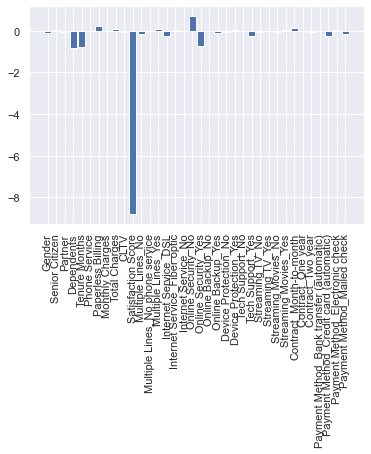

In [23]:
plt.bar([x for x in columns], importance)
plt.xticks(rotation=90);

### Not using features with coefficients of 0 

In [11]:
X_train_df = pd.DataFrame(X_train, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_Yes', 'Tech Support_No', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'])

cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
        'Paperless Billing','Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
        'Multiple Lines_Yes', 'Internet Service_DSL', 'Internet Service_Fiber optic',
        'Online Security_No', 'Online Security_Yes', 'Online Backup_Yes', 'Device Protection_No',
        'Device Protection_Yes', 'Tech Support_Yes','Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
        'Streaming Movies_Yes', 'Contract_Month-to-month','Contract_Two year',
        'Payment Method_Credit card (automatic)','Payment Method_Electronic check', 'Payment Method_Mailed check']

In [12]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f2_score' : make_scorer(fbeta_score, beta=2)}

model = LogisticRegressionCV(cv=5, class_weight={1 : 5, 0 : 1}, solver="liblinear", Cs=10, penalty="l1")

results = cross_validate(model, X_train_df[cols], y_train, cv=5, scoring=scoring)

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print("Metric:", metric_name)
    print("Scores:", results[metric_name])
    print("Average score:", average_score)
    print(" ")

Metric: fit_time
Scores: [4.47657323 3.99187899 8.649436   8.44570804 6.15514088]
Average score: 6.3437474250793455
 
Metric: score_time
Scores: [0.00806594 0.01041889 0.01764011 0.01145601 0.01076317]
Average score: 0.011668825149536132
 
Metric: test_precision
Scores: [0.81460674 0.79063361 0.81058496 0.78284182 0.76075269]
Average score: 0.7918839639668149
 
Metric: test_recall
Scores: [0.96989967 0.95986622 0.97324415 0.97658863 0.94648829]
Average score: 0.9652173913043478
 
Metric: test_f2_score
Scores: [0.93427835 0.92046183 0.93569132 0.930529   0.90242347]
Average score: 0.9246767944206292
 


## 7. Scoring the model on the test data 

In [13]:
X_test_df = pd.DataFrame(X_test, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_Yes', 'Tech Support_No', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'])

cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
        'Paperless Billing','Total Charges', 'CLTV', 'Satisfaction Score', 'Multiple Lines_No',
        'Multiple Lines_Yes', 'Internet Service_DSL', 'Internet Service_Fiber optic',
        'Online Security_No', 'Online Security_Yes', 'Online Backup_Yes', 'Device Protection_No',
        'Device Protection_Yes', 'Tech Support_Yes','Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
        'Streaming Movies_Yes', 'Contract_Month-to-month','Contract_Two year',
        'Payment Method_Credit card (automatic)','Payment Method_Electronic check', 'Payment Method_Mailed check']

In [14]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f2_score' : make_scorer(fbeta_score, beta=2)}

model = LogisticRegressionCV(cv=5, class_weight={1 : 5, 0 : 1}, solver="liblinear", Cs=10, penalty="l1")
model.fit(X_train_df[cols], y_train)

y_pred = model.predict(X_test_df[cols])

f2_score = make_scorer(fbeta_score, beta=2)

test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, 2)

print("Test precision:", test_precision, "Test recall:", test_recall, "Test F2:", f2_score)

Test precision: 0.7991071428571429 Test recall: 0.9572192513368984 Test F2: 0.9207818930041152


/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [15]:
for i,v in enumerate(importance):
    print('Feature:', cols[i])
    print('Coefficient:', v)

Feature: Gender
Coefficient: -0.08960348131857125
Feature: Senior Citizen
Coefficient: 0.02581226236930513
Feature: Partner
Coefficient: -0.033892757523046144
Feature: Dependents
Coefficient: -0.8450034096449851
Feature: Tenure Months
Coefficient: -0.7641326979954903
Feature: Paperless Billing
Coefficient: 0.0
Feature: Total Charges
Coefficient: 0.24087091396810628
Feature: CLTV
Coefficient: 0.0
Feature: Satisfaction Score
Coefficient: 0.08850872918193632
Feature: Multiple Lines_No
Coefficient: -0.03426998959609204
Feature: Multiple Lines_Yes
Coefficient: -8.79333301769941
Feature: Internet Service_DSL
Coefficient: -0.1481544069025604
Feature: Internet Service_Fiber optic
Coefficient: 0.0
Feature: Online Security_No
Coefficient: 0.08741788555181607
Feature: Online Security_Yes
Coefficient: -0.14303001766237977
Feature: Online Backup_Yes
Coefficient: 0.1430481803394234
Feature: Device Protection_No
Coefficient: 0.0
Feature: Device Protection_Yes
Coefficient: 0.22798633598010734
Feature:

IndexError: list index out of range

In [16]:
print(max(importance, key=abs))

-8.79333301769941


In [ ]:
plt.bar([x for x in cols], importance)
plt.xticks(rotation=90);